In [1]:
import random
from functions import solve_fjs_with_parallel_machines
from functions import generate_random_instance
from functions import plot_gantt
from functions import SchedulingProblem
from tabu_search import TabuSearch
from simulated_annealing import SimulatedAnnealing
from genetic import GeneticAlgorithm

In [2]:
# 參數
ALPHA = 0.5
NUM_JOBS = 50
CENTERS = ('C1','C2','C3',"C4","C5","C6","C7","C8")
CENTER_CAPS = {'C1':3,'C2':2,'C3':1,"C4":2,"C5":3,"C6":1,"C7":2,"C8":3}
NUM_OPS = {'C1':1,'C2':1,'C3':1,"C4":1,"C5":1,"C6":1,"C7":1,"C8":1}
# 生成隨機實例
random.seed(42)
jobs_data, release_dates, due_dates, weights, setup_times, center_caps = generate_random_instance(
    num_jobs = NUM_JOBS, centers = CENTERS, center_caps = CENTER_CAPS, num_ops = NUM_OPS
)

Jobs: 50, Centers: {'C1': 3, 'C2': 2, 'C3': 1, 'C4': 2, 'C5': 3, 'C6': 1, 'C7': 2, 'C8': 3}
Objective value = alpha * C_max + (1 - alpha) * Σ wj·Tj = 12749.5



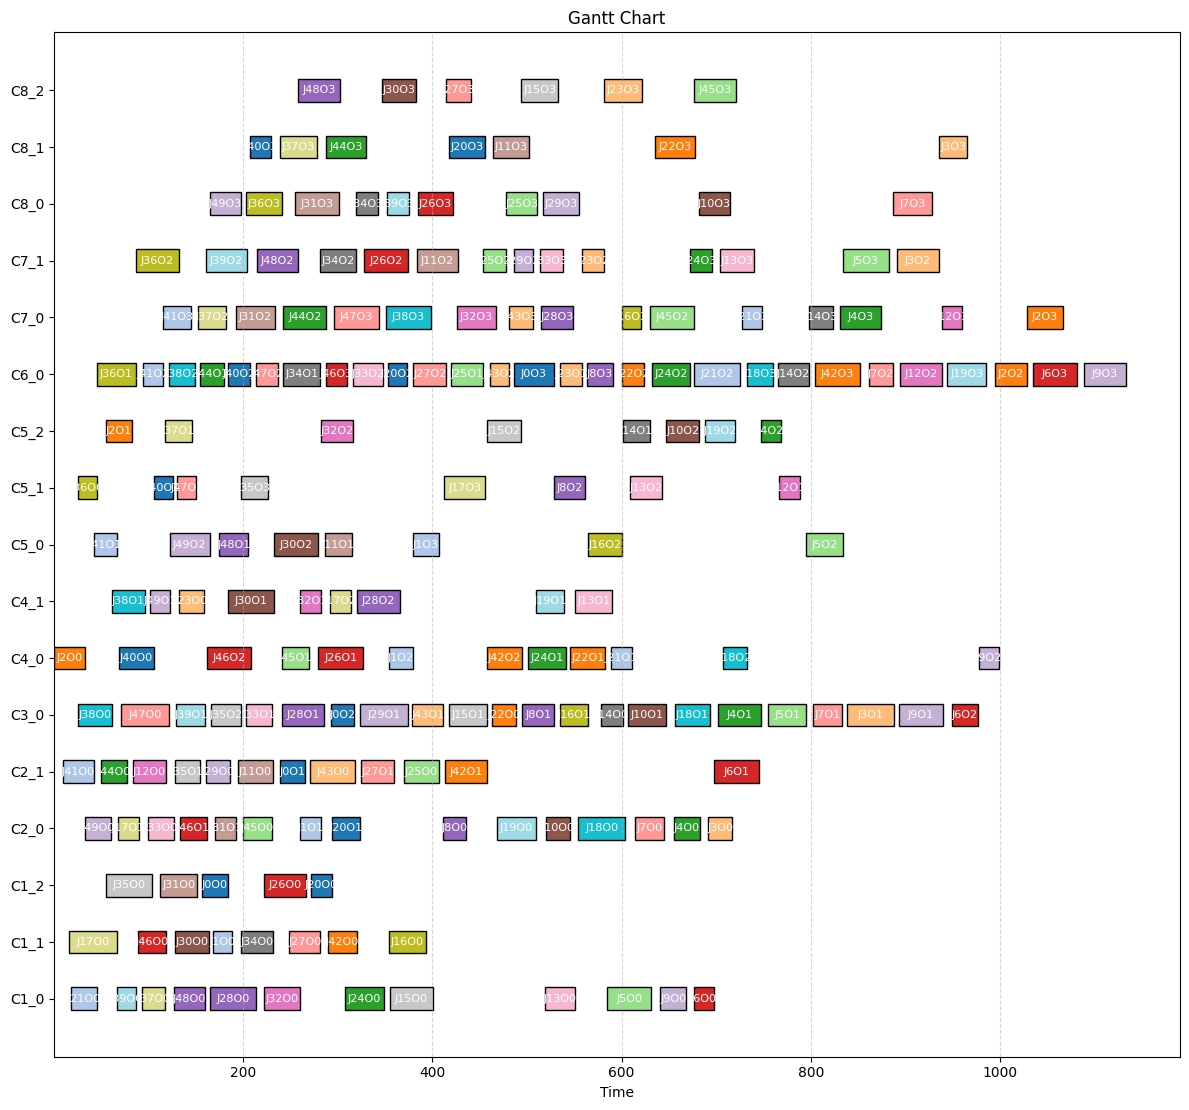

In [3]:
#求解
# 故意限制 solver.parameters.max_time_in_seconds = 5 求得較差解
schedule, obj = solve_fjs_with_parallel_machines(
    jobs_data, release_dates, due_dates, weights, setup_times, center_caps, alpha = ALPHA
)

print(f"Jobs: {len(jobs_data)}, Centers: {center_caps}")
print(f"Objective value = alpha * C_max + (1 - alpha) * Σ wj·Tj = {obj}\n")
plot_gantt(schedule)

In [4]:
machs, times = {}, {}
for j, ops in schedule.items():
    for o, m, start, end in ops:
        machs[(j,o)] = m
        times[(j,o)] = (start, end)

seed_solution = (machs, times)
problem = SchedulingProblem(jobs_data, release_dates, due_dates, weights, setup_times, center_caps, alpha = ALPHA)

Objective value = 9727.5



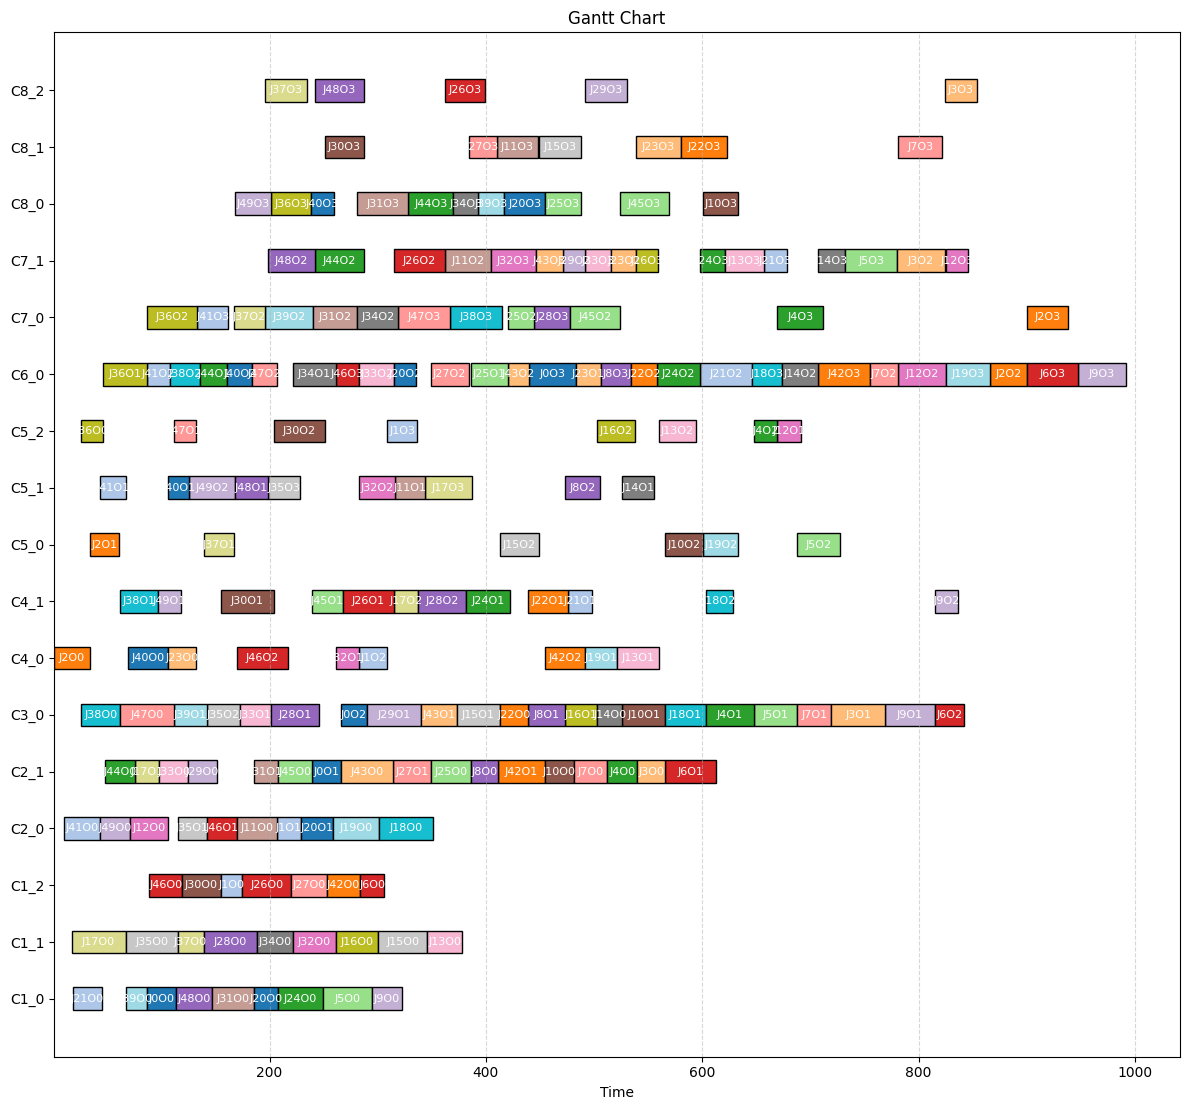

In [5]:
Tabu = TabuSearch(problem, steps = 1000, tabu_size = 30)
best_obj, best_schedule = Tabu.run(seed_solution)
print(f"Objective value = {best_obj}\n")
best_schedule = problem.generate_schedule(best_schedule[0], best_schedule[1])
plot_gantt(best_schedule)

Objective value = 11057.5



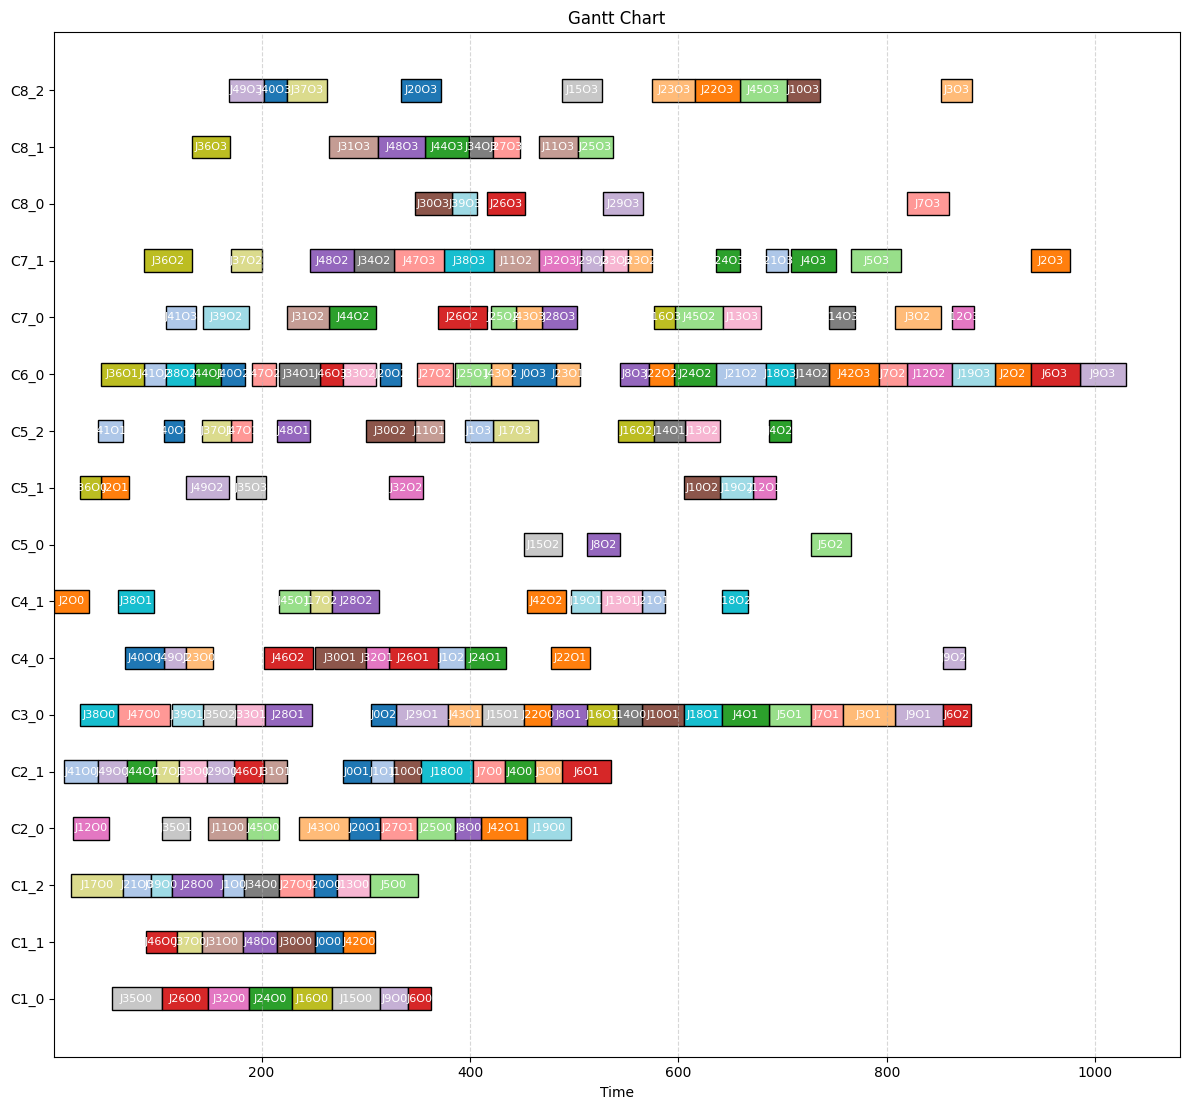

In [6]:
SA = SimulatedAnnealing(problem, initial_temperature = 1000, min_temperature = 1, max_iteration = 200, steps = 100)
best_obj, best_schedule = SA.run(seed_solution)
print(f"Objective value = {best_obj}\n")
best_schedule = problem.generate_schedule(best_schedule[0], best_schedule[1])
plot_gantt(best_schedule)

Objective value = 9765.0



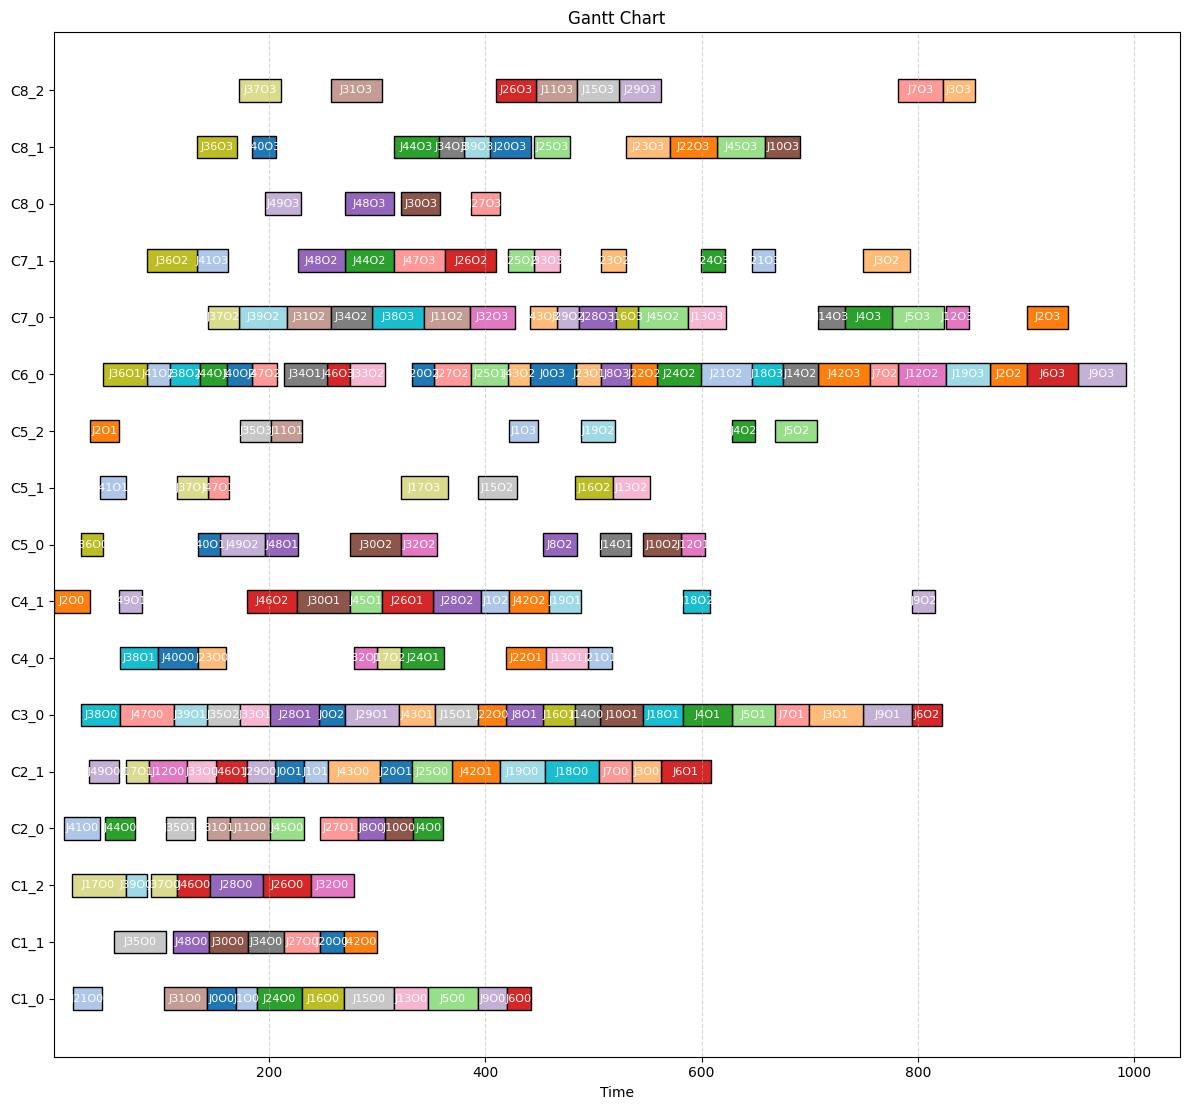

In [7]:
GA = GeneticAlgorithm(problem, pop_size = 100, max_generations = 100)
best_obj, best_schedule = GA.run(seed_solution)
print(f"Objective value = {best_obj}\n")
best_schedule = problem.generate_schedule(best_schedule[0], best_schedule[1])
plot_gantt(best_schedule)